# AI / DA -Projekti TTC8070-3001 

## Ryhmä 2 




## Tehtävä 1 b: Liiketoimintavaatimukset

Aurinkopaneelit ja vihreät arvot ovat kuuma puheenaihe tänäpäivänä ja aurinkopaneeleiden myynti ja tuotanto ovat olleet viimeaikona nousussa. Analysoimalla viime vuosikymmenien dataa voidaan ennustaa tulevaisuuden myyntiä ja varautua kysyntään paremmin. Aurinkopaneeli aineistoa voidaan hyödyntää esimerkiksi yrityksen asiakkaille tehtäviin kustannusarviointeihin ja voidaan tarjota asiakkailla myös työkalu, jolla asiakas voi tehdä henkilökohtaisen kustannusarvion oman kiinteistön tiedoilla. Datasetistä voidaan myös etsiä eroja asiakkaiden käyttäytymisessä eri osavaltioden välillä ja tehdä malli, jota voidaan skaalata toimimaan myös muissa osavaltioissa. 

Asiakkaan tietoa voidaan ja myös pitää hyödyntää esimerkiksi datan sarakkeiden selittämiseen, koska tällä hetkellä useat sarakkeet näennäisesti muistuttavat toisiaan, mutta sisältävät vaihtelevasti eri arvoja. Asiakkaiden liiketoiminna tuntemusta tulee myös kuunnella, koska siitä saa lisää ymmärrystä datasetin tulkitsemiseen ja myös parempaa ymmärrystä aurinkopaneeleista ja niiden käyttö kohteista.
Asiakas haluaa maksimoida tuotot, tehostaa liiketoimintamallia ja myös mahdollisesti löytää datasta ennalta tuntemattomia asioita/trendejä, joita voisi mahdollisesti hyödyntää liiketoiminnan kehityksessä.


- Projektin vaatimukset tällähetkellä:
    - Datan visualisointi:
        - Tehtävänanto
        - Yleisin asennettujen järjestelmien koko eri vuosina. Tähän liittyen tulisi selvittää hinta ja järjestelmäkoko kuluttaja- ja yritysasiakkaiden osalta asennusvuosittain (ts. millaisia järjestelmiä kunakin vuonna on asennettu näille asiakastyypeille)?
        - Asennettujen järjestelmien hintakehitys vuosien varrella?
        - Minkä kokoisia inverttereitä ajetaan ylikuormalla?
        - Yritys- ja kuluttaja-asiakkaiden osuudet osavaltioittain tai kaupungeittain?
        - Kuinka pitkään paneelivalmistajat ja asennusfirmat ovat toimineet alalla?
        - Optio: Näistä lisäksi myyntimäärät ja myyntimäärien kehitys vuosien saatossa.
        - Millä aurinkopaneelijärjestelmillä on paras hinta-teho-suhde?
        - Optio: Kaupunkien ryhmittely suuremmiksi alueiksi (kuitenkin pienemmät alueet kuin osavaltiot) (vinkki: Rest APIn hyödyntäminen).



## Tehtävä 2: Datan visualisointi


In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

data = pd.read_csv('./data/LBNL_file.csv', low_memory=False)

df = data.replace([-9999, '-9999', -9999.0], np.nan)



In [15]:
df2 = df.copy()
df2['installation_year'] = pd.to_datetime(df['installation_date']).dt.year
df2['price_per_kw'] = df['total_installed_price'] / df['system_size_DC']

### Aurinkopaneelijärjestelmien koko- ja hintakehitys vuosittain
Aurinkopaneelien koko on kasvanut huomattavasti aikavälillä 1999-2019. Varsinkin kaupalliseen tarkoitukseen tarkoitetut järjestelmät ovat kasvaneet merkittävästi. Järjestelmien hinta on vastaavasti tippunut samalla, kun järjestelmien koko on kasvanut. 
#### Yritysasiakkaat (commercial)


<AxesSubplot:title={'center':'Kaupallisten järjestelmien keskikoko'}, xlabel='Vuosi', ylabel='Järjestelmän keskikoko (kW)'>

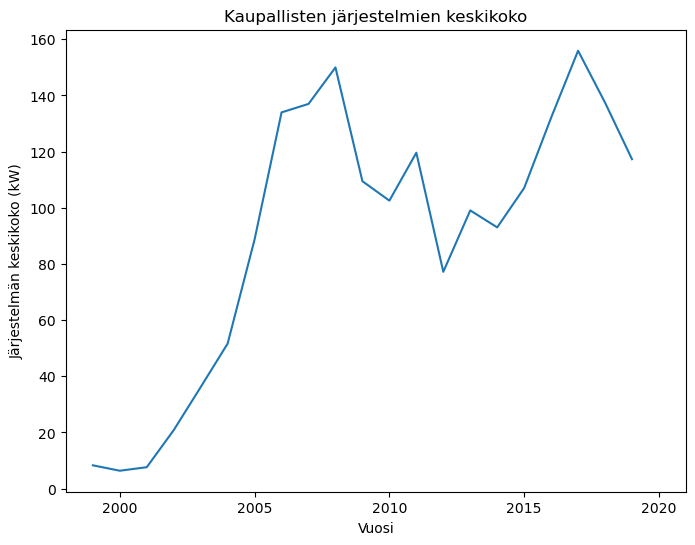

In [16]:

com = df2[df2['customer_segment'] == 'COM']

com2 = pd.DataFrame()
com2['average_system_size'] = com['system_size_DC'].groupby(df2['installation_year']).mean()
com2['average_system_price'] = com['total_installed_price'].groupby(df2['installation_year']).mean()
com2['average_price_per_kw'] = com['price_per_kw'].groupby(df2['installation_year']).mean()
com2.reset_index()

com2.plot(
    y='average_system_size', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskikoko (kW)', 
    title='Kaupallisten järjestelmien keskikoko', 
    use_index=True, 
    figsize=(8,6), 
    legend=False,
    xlim=(1998,2021)
)


<AxesSubplot:title={'center':'Kaupallisten järjestelmien keskihinta'}, xlabel='Vuosi', ylabel='Järjestelmän keskihinta ($/kW)'>

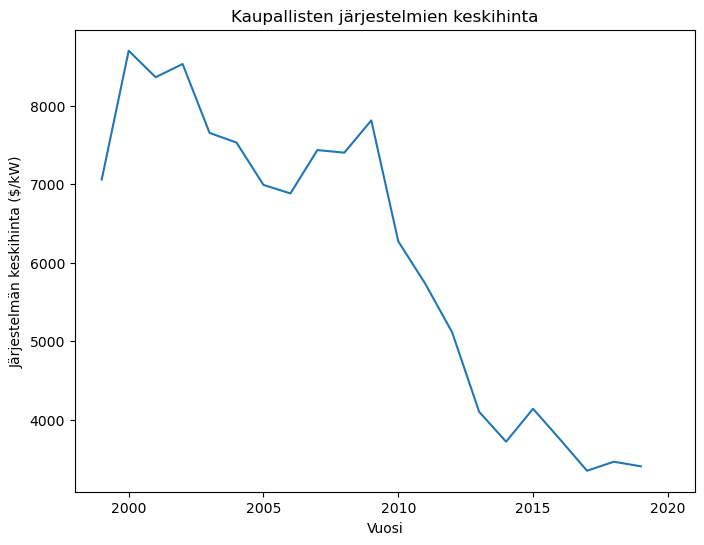

In [17]:
com2.plot(
    y='average_price_per_kw', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskihinta ($/kW)', 
    title='Kaupallisten järjestelmien keskihinta',  
    figsize=(8,6),
    use_index=True,
    legend=False,
    xlim=(1998,2021)
)



#### Kuluttajat (Residential)

<AxesSubplot:title={'center':'Kuluttaja-asiakkaiden järjestelmien keskikoko'}, xlabel='Vuosi', ylabel='Järjestelmän keskikoko (kW)'>

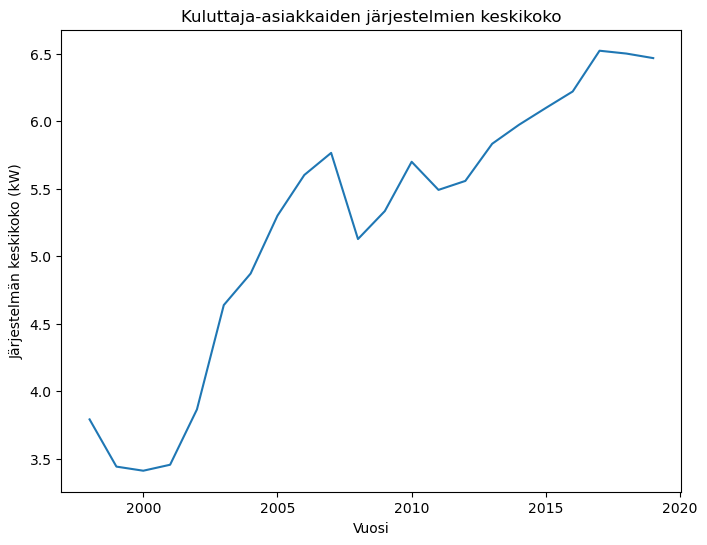

In [18]:
res = df2[df2['customer_segment'] == 'RES']

res2 = pd.DataFrame()
res2['average_system_size'] = res['system_size_DC'].groupby(df2['installation_year']).mean()
res2['average_system_price'] = res['total_installed_price'].groupby(df2['installation_year']).mean()
res2['average_price_per_kw'] = res['price_per_kw'].groupby(df2['installation_year']).mean()
res2.reset_index()

res2.plot(y='average_system_size', 
          kind='line', 
          xlabel='Vuosi', 
          ylabel='Järjestelmän keskikoko (kW)', 
          title='Kuluttaja-asiakkaiden järjestelmien keskikoko', 
          use_index=True, 
          figsize=(8,6), 
          legend=False)


<AxesSubplot:title={'center':'Kuluttaja-asiakkaiden järjestelmien keskihinta $/kW'}, xlabel='Vuosi', ylabel='Järjestelmän keskihinta ($/kW)'>

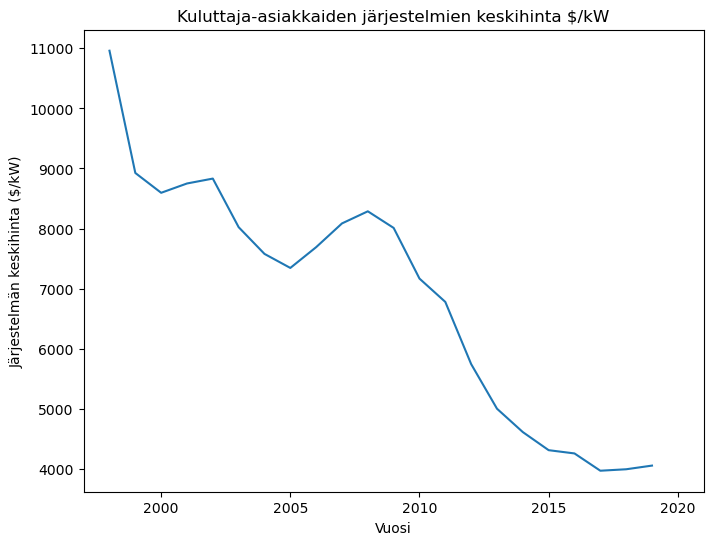

In [19]:
res2.plot(
    y='average_price_per_kw', 
    kind='line', xlabel='Vuosi', 
    ylabel='Järjestelmän keskihinta ($/kW)', 
    title='Kuluttaja-asiakkaiden järjestelmien keskihinta $/kW',  
    figsize=(8,6), 
    legend=False,
    xlim=(1997,2021)
)


### Minkä kokoisia inverttereitä ajetaan ylikuormalla?

Näyttäisi siltä, että kaikenkokoisia inverttereitä voidaan ajaa ylikuormalla. Kaaviossa on punaisella ne järjestelmät, joissa invertterin ja järjestelmän tehon suhde (load ratio) on yli 1 

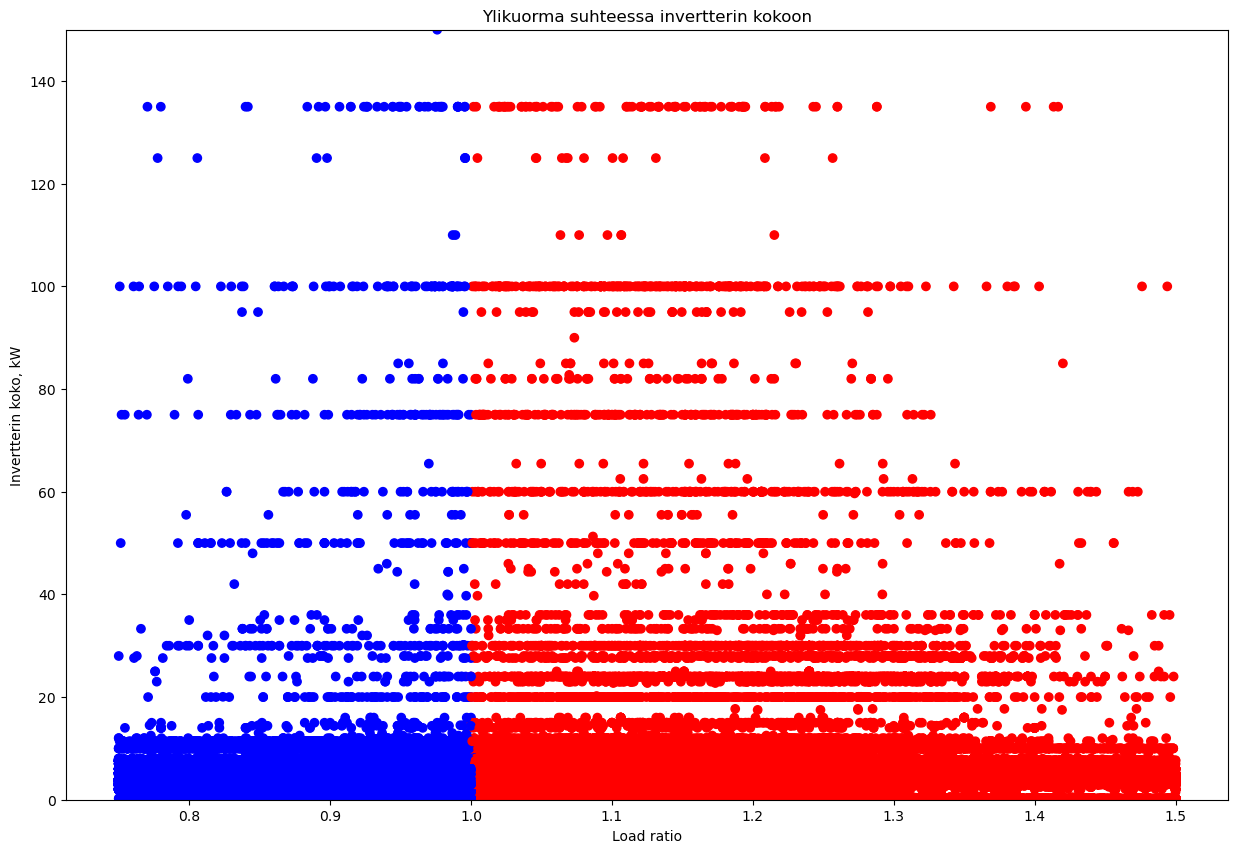

In [20]:


y=df2['output_capacity_inverter_1']
x=df2['inverter_loading_ratio']

col = np.where(x>1, 'r', 'b')

plt.figure(figsize=(15,10))
plt.scatter(x, y, c=col)

plt.title("Ylikuorma suhteessa invertterin kokoon")
plt.xlabel('Load ratio')
plt.ylabel('Invertterin koko, kW')
plt.ylim(0,150)
plt.show()

### Yritys- ja kuluttaja-asiakkaiden osuudet osavaltioittain tai kaupungeittain

Datasetissä on vain 3 osavaltiota ja Californian osuus on melkein 100% kaikista asennetuista paneeleista. Alla olevassa erittelyssä vain n. 1000 aurinkopaneelia sijaitsi muualla kuin Californiassa

In [21]:
df = data.copy()

df = data.replace([-9999, '-9999', -9999.0], np.nan)



df_res = df[df["customer_segment"].isin(["COM","RES"])]

pic1 = pd.crosstab(df_res["customer_segment"],df_res['state'],values = df_res['state'], aggfunc="count",margins= False)
pic1

state,AR,AZ,CA
customer_segment,,,
COM,11.0,NaN,19682.0
RES,92.0,858.0,973361.0


Tässä vielä kuvaajana sama, vaikka se onkin lukukelvoton

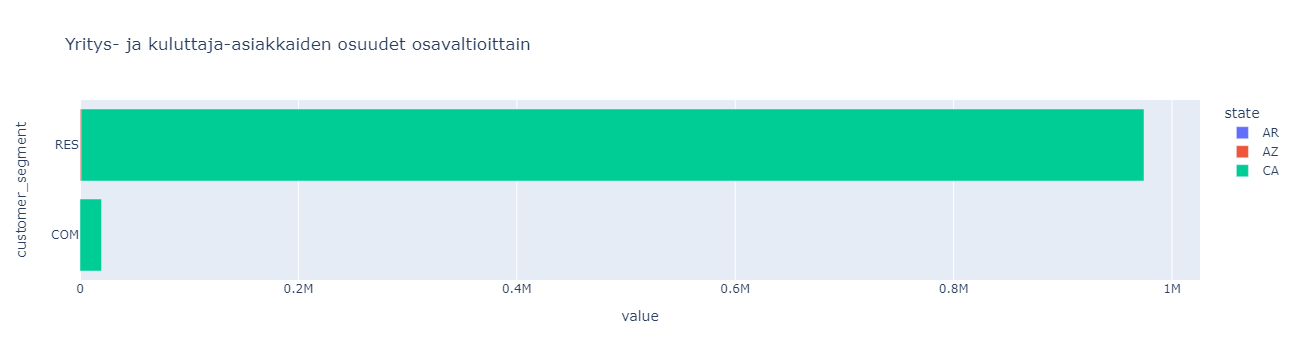

In [22]:
pic2 = pd.crosstab(df_res["customer_segment"],df_res['state'],values = df_res['state'], aggfunc="count",margins= False)
px.bar(pic2, color="state", orientation='h', title="Yritys- ja kuluttaja-asiakkaiden osuudet osavaltioittain")

Yritys- ja kuluttaja-asiakkaiden osuudet kaupungeittain. Kaupunkeja löytyy yhteensä 2657kpl ja alla tulostettu niiden jakauma ensin kirjallisena ja sitten kuvaajana.

In [23]:
pic3 = pd.crosstab(df_res["customer_segment"],df_res['city'],values = df_res['city'], aggfunc="count",margins= False)
pic3

city,29 Palms,ACAMPO,ACTON,ADELANTO,AGOURA,AGOURA HILLS,AGUA DULCE,AGUANGA,AHWAHNEE,ALAMO,...,walnut Creek,walnut creek,west covina,westminster,whittier,wildomar,willows,wofford heights,yorba linda,yucaipa
customer_segment,,,,,,,,,,,,,,,,,,,,,
COM,1.0,23.0,NaN,20.0,NaN,5.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RES,44.0,387.0,241.0,784.0,5.0,533.0,16.0,19.0,64.0,772.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0


Kuvaaja on hieman sekava, koska siinä on useita kaupunkeja, mutta kuvaajasta pystyy näkemään, että San Diego, Bakersfield, Fresno ja San Jose ovat suurimmat yksittäiset kaupungit ja muuten lukumäärät jakautuvat melko tasaisesti

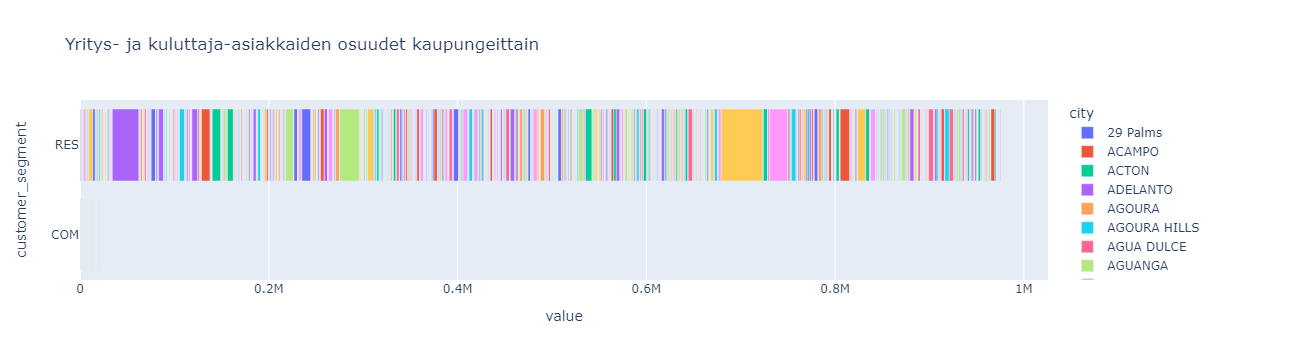

In [24]:
px.bar(pic3, color="city", orientation='h', title="Yritys- ja kuluttaja-asiakkaiden osuudet kaupungeittain")

- Kuinka pitkään paneelivalmistajat ja asennusfirmat ovat toimineet alalla?
- Optio: Näistä lisäksi myyntimäärät ja myyntimäärien kehitys vuosien saatossa.

Ensimmäisenä eri asennusfirmojen top 10 pisimpään asennuksia tehneet firmat. Asennusfirmoja on yhteensä 4741, niin selkeyden vuoksi vain top10 tulostetaan.

In [25]:
df["installation_date"] = pd.to_datetime(df["installation_date"])

df_installers = df[["installer_name", "installation_date"]]

df_installers = df_installers.dropna(axis=0)

pic4 = df_installers.sort_values(["installation_date","installer_name"]).groupby(["installer_name"])["installation_date"].apply(lambda x: x.max() - x.min()).astype('timedelta64[Y]').nlargest(10)

pic4

installer_name
Mendocino Solar Service        21.0
Sun Light And Power            21.0
Tesla Energy                   21.0
Alternative Power Solutions    20.0
Offline Solar                  20.0
Real Goods Solar               20.0
Santa Cruz Renewables          20.0
Self                           20.0
Altair Solar                   19.0
Occidental Power               19.0
Name: installation_date, dtype: float64

installation_year
1998        1
2003        1
2007      376
2008      876
2009     1275
2010      970
2011     3092
2012     4834
2013    11404
2014    21527
2015    44567
2016    36308
2017    18212
2018    16398
2019    10269
Name: installation_year, dtype: int64


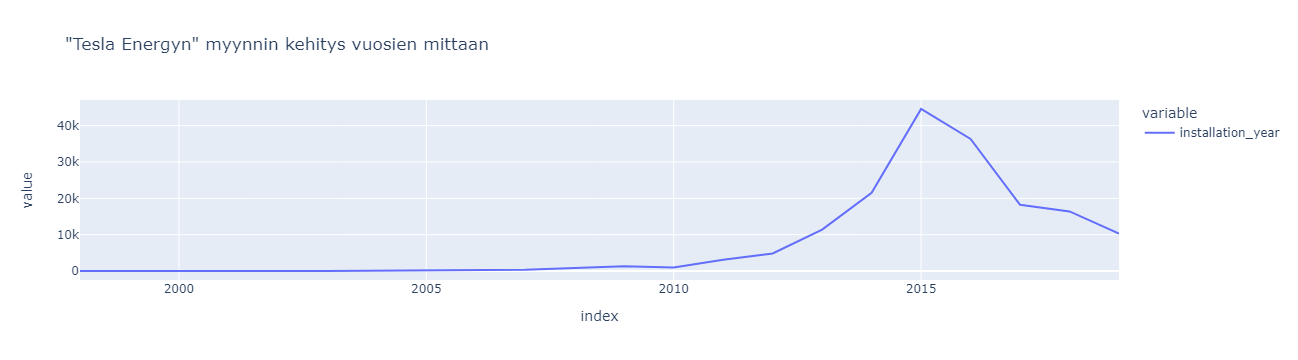

In [26]:
company = "Tesla Energy"
df_tesla = df_installers.loc[df["installer_name"] == company,["installer_name", "installation_date"]].sort_values("installation_date")

df_tesla["installation_year"] = pd.to_datetime(df_tesla['installation_date']).dt.year

df_tesla = df_tesla.groupby("installation_year")["installation_year"].count()

print(df_tesla)

fig = px.line(df_tesla,title='"Tesla Energyn" myynnin kehitys vuosien mittaan')
fig.show()

Kymmenen pisimpään aurinkopaneeleita valmistaneita firmoja.

In [27]:
df_manufacturers = df[["module_manufacturer_1", "installation_date"]]

df_manufacturers = df_manufacturers.dropna(axis=0)

pic5 = df_manufacturers.sort_values(["installation_date","module_manufacturer_1"]).groupby(["module_manufacturer_1"])["installation_date"].apply(lambda x: x.max() - x.min()).astype('timedelta64[Y]').nlargest(10)

pic5

module_manufacturer_1
Kyocera Solar          21.0
SolarWorld             18.0
BP Solar               16.0
Schott Solar           16.0
Sharp                  16.0
SunPower               16.0
Suniva                 16.0
Evergreen Solar        14.0
Mitsubishi Electric    14.0
Panasonic              14.0
Name: installation_date, dtype: float64

installation_year
1998        1
2003       56
2004      382
2005      317
2006      429
2007      658
2008      877
2009      885
2010     1046
2011     2797
2012     1964
2013     1302
2014     1788
2015    15849
2016    14774
2017      927
2018      167
2019      219
Name: installation_year, dtype: int64


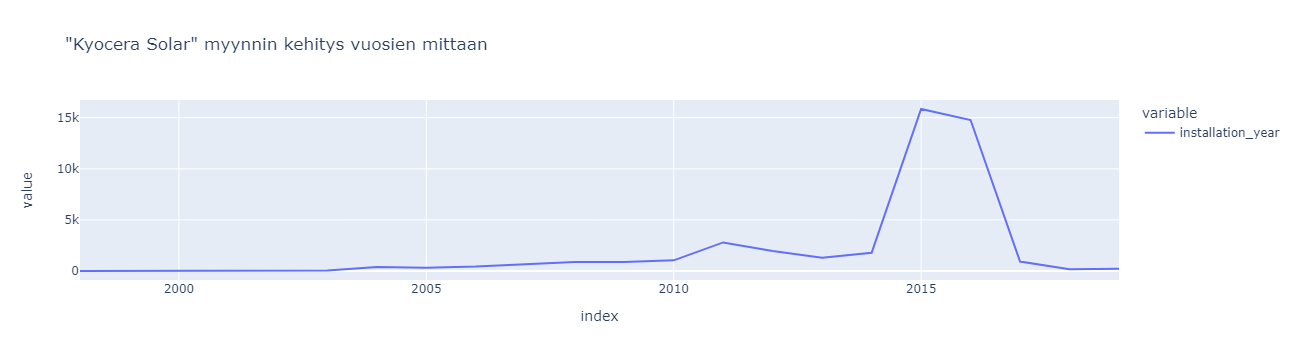

In [28]:
company = "Kyocera Solar"
df_Kyocera = df_manufacturers.loc[df["module_manufacturer_1"] == company,["module_manufacturer_1", "installation_date"]].sort_values("installation_date")

df_Kyocera["installation_year"] = pd.to_datetime(df_Kyocera['installation_date']).dt.year

df_Kyocera = df_Kyocera.groupby("installation_year")["installation_year"].count()

print(df_Kyocera)

fig = px.line(df_Kyocera,title='"Kyocera Solar" myynnin kehitys vuosien mittaan')
fig.show()

### Minkä valmistajan laitteilla on paras hinta-teho-suhde?

Käytin laskukaavaa Hinta/hyötysuhde*järjestelmän koko, mutta numerot näyttävät melko oudoilta.

In [29]:
df_price = df[["module_manufacturer_1","system_size_DC", "total_installed_price","efficiency_module_1"]]

df_price = df_price.dropna(axis=0)

df_price["price/effiency"] = df["total_installed_price"] / (df["efficiency_module_1"]*df["system_size_DC"])
df_price = df_price.groupby(["module_manufacturer_1"])["price/effiency"].max().round(2).nlargest(10)

df_price

module_manufacturer_1
SunPower                4590448.47
SolarCity Corp          1960202.23
LG Electronics Inc.     1406300.00
SolarWorld              1223776.22
Kyocera Solar            855306.12
Canadian Solar Inc.      787647.87
BP Solar                 712875.75
Mission Solar Energy     698544.68
Sharp                    674194.28
First Solar, Inc.        534056.79
Name: price/effiency, dtype: float64